# vLife Virtusa

## Predicting Time Period for a Particular Phase in clinical trials Usecase
### Usecase Description
<b>Every phase in a clinical trial takes a lot of time to complete. Based on the data collected from NYS clinical trials, this tool will predict the number of days it would take to complete a phase in a clinical trial</b>

### Data Source
> Dataset for this usecase is extracted from Data as Service vLife Clinical Trails API

### Dataset Description
###### For Dataset Description Please visit vLife Data as Service Portal

### Import Section

In [1]:
import requests
import pandas as pd
import numpy as np
from functools import reduce
from flask import request
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [858]:
df = pd.read_csv('studies.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [859]:
df.columns

Index(['acronym', 'baseline_population', 'biospec_description',
       'biospec_retention', 'brief_title', 'completion_date',
       'completion_date_type', 'completion_month_year', 'created_at',
       'disposition_first_posted_date', 'disposition_first_posted_date_type',
       'disposition_first_submitted_date',
       'disposition_first_submitted_qc_date', 'enrollment', 'enrollment_type',
       'expanded_access_type_individual', 'expanded_access_type_intermediate',
       'expanded_access_type_treatment', 'first_received_date',
       'first_received_results_date', 'has_dmc', 'has_expanded_access',
       'index', 'is_fda_regulated_device', 'is_fda_regulated_drug', 'is_ppsd',
       'is_unapproved_device', 'is_us_export', 'last_changed_date',
       'last_known_status', 'last_update_posted_date',
       'last_update_submitted_date', 'last_update_submitted_qc_date',
       'limitations_and_caveats', 'nct_id', 'nlm_download_date_description',
       'number_of_arms', 'number_of_grou

In [860]:
df = df[['nct_id','start_date','completion_date','phase','enrollment']]

In [861]:
df

,nct_id,start_date,completion_date,phase,enrollment
0,NCT02487537,2015-03-01,2016-12-01,NaN,16.0
1,NCT02306161,2014-12-08,NaN,Phase 3,330.0
2,NCT02487511,2015-08-01,2017-01-31,Phase 4,387.0
3,NCT02487498,2015-07-27,2016-09-06,Phase 3,355.0
4,NCT02487485,2016-03-01,2018-08-01,Phase 2,30.0
5,NCT02487472,2016-01-19,2017-08-28,NaN,1.0
6,NCT02305992,2015-12-31,2017-12-31,NaN,0.0
7,NCT02487277,2015-07-01,2020-12-01,Phase 2,36.0
8,NCT02487446,2015-07-28,2016-09-12,Phase 3,357.0
9,NCT02487433,2015-06-01,2015-07-01,Phase 1,18.0


### Exploratory Data Analysis
> <b> Data Preprocessing </b>

In [7]:
df = df. dropna()
df

,nct_id,start_date,completion_date,phase
2,NCT02487511,2015-08-01,2017-01-31,Phase 4
3,NCT02487498,2015-07-27,2016-09-06,Phase 3
4,NCT02487485,2016-03-01,2018-08-01,Phase 2
7,NCT02487277,2015-07-01,2020-12-01,Phase 2
8,NCT02487446,2015-07-28,2016-09-12,Phase 3
9,NCT02487433,2015-06-01,2015-07-01,Phase 1
11,NCT02487407,2015-07-01,2017-06-01,Phase 2
14,NCT02487381,2015-04-01,2015-08-01,Phase 1
16,NCT02487355,2015-05-01,2017-12-01,Phase 2/Phase 3
19,NCT02487316,2015-07-01,2017-12-01,Phase 4


In [8]:
df.reset_index(inplace = True) 

In [9]:
df=df.drop(['index'], axis = 1)

In [869]:
df

,nct_id,start_date,completion_date,phase,enrollment
0,NCT02487537,2015-03-01,2016-12-01,NaN,16.0
1,NCT02306161,2014-12-08,NaN,Phase 3,330.0
2,NCT02487511,2015-08-01,2017-01-31,Phase 4,387.0
3,NCT02487498,2015-07-27,2016-09-06,Phase 3,355.0
4,NCT02487485,2016-03-01,2018-08-01,Phase 2,30.0
5,NCT02487472,2016-01-19,2017-08-28,NaN,1.0
6,NCT02305992,2015-12-31,2017-12-31,NaN,0.0
7,NCT02487277,2015-07-01,2020-12-01,Phase 2,36.0
8,NCT02487446,2015-07-28,2016-09-12,Phase 3,357.0
9,NCT02487433,2015-06-01,2015-07-01,Phase 1,18.0


> <b> Feature Engineering </b>

In [874]:
df2 = pd.read_csv('dropWithdrawals.csv')

In [875]:
df2.columns

Index(['count', 'ctgov_group_code', 'id', 'index', 'nct_id', 'period',
       'reason', 'result_group_id'],
      dtype='object')

In [876]:
df2=df2[['nct_id','count']]

In [878]:
df1 = pd.read_csv('browseConditions.csv')

In [879]:
df1.columns

Index(['downcase_mesh_term', 'id', 'index', 'mesh_term', 'nct_id'], dtype='object')

In [880]:
df1 = df1[['nct_id','mesh_term']]
df1

,nct_id,mesh_term
0,NCT01014364,"Pneumonia, Viral"
1,NCT01014338,Lung Diseases
2,NCT01013948,"Pulmonary Disease, Chronic Obstructive"
3,NCT01013922,Lung Diseases
4,NCT01013922,"Lung Diseases, Obstructive"
5,NCT01013922,"Pulmonary Disease, Chronic Obstructive"
6,NCT01013896,Fibrosis
7,NCT01013896,Cystic Fibrosis
8,NCT01013883,Heart Failure
9,NCT00993967,Friedreich Ataxia


In [881]:
result = pd.merge(df,df1,on = 'nct_id')
result = pd.merge(result,df2,on = 'nct_id')
result = result[['nct_id','mesh_term','phase','start_date','completion_date','enrollment','count']]

In [892]:
result['phase']=result['phase'].astype('str')

In [21]:
countries = pd.read_csv("countries.csv")

In [22]:
result_2 = pd.merge(result,countries,on = 'nct_id')

In [24]:
result_2 = result_2[["nct_id","mesh_term","phase","start_date","completion_date","name"]]

In [26]:
result_2.to_csv('Visual.csv')

In [885]:
result['start_date'] = pd.to_datetime(result['start_date'])

In [886]:
result['completion_date'] = pd.to_datetime(result['completion_date'])

In [887]:
result.dtypes

nct_id                     object
mesh_term                  object
phase                      object
start_date         datetime64[ns]
completion_date    datetime64[ns]
enrollment                float64
count                       int64
dtype: object

In [924]:
result=result.dropna()

In [925]:
result['number_of_days'] = result['completion_date'] - result['start_date']

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [926]:
result['mesh_term'].value_counts()

Diabetes Mellitus                         685
Hepatitis                                 563
Hepatitis C                               544
Asthma                                    374
Diabetes Mellitus, Type 2                 370
Lung Diseases                             330
Disease                                   325
Arthritis, Rheumatoid                     273
Arthritis                                 271
Depression                                261
Pulmonary Disease, Chronic Obstructive    245
Lung Diseases, Obstructive                238
Hypertension                              214
Infection                                 204
Hepatitis C, Chronic                      202
Vomiting                                  199
Psoriasis                                 198
Chronic Disease                           194
Hepatitis A                               177
Hepatitis, Chronic                        175
Lymphoma                                  172
Communicable Diseases             

In [927]:
phase=[]
for i in result['phase']:
    if '/' in i:
        i=i.split('/')[0]
    phase.append(i)

In [928]:
result['number_of_days']=result['number_of_days'].astype('str')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [929]:
result['number_of_days'].head(5)

0    412 days 00:00:00.000000000
1    412 days 00:00:00.000000000
2    412 days 00:00:00.000000000
3    412 days 00:00:00.000000000
4    412 days 00:00:00.000000000
Name: number_of_days, dtype: object

In [930]:
nod=[]
for i in result['number_of_days']:
    i=i.split(' ')[0]
    nod.append(i.strip())

In [ ]:
mesh=[]
for i in result['mesh_term']:
    i=i.split(',')
    mesh.append(i[0])

In [ ]:
result['mesh_term']=mesh

In [932]:
result['phase']=phase

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [934]:
result['number_of_days']=list(map(int,nod))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [935]:
result['start_date'][0]

Timestamp('2015-07-28 00:00:00')

In [ ]:
result.to_csv('time_period.csv')

In [4]:
result=pd.read_csv('time_period.csv')

In [5]:
result[result['mesh_term']=="Kidney Failure"]

,Unnamed: 0,nct_id,mesh_term,phase,start_date,completion_date,enrollment,count,number_of_days
5994,6082,NCT01895322,Kidney Failure,Phase 2,2013-07-01,2014-08-01,20.0,10,396
5995,6083,NCT01895322,Kidney Failure,Phase 2,2013-07-01,2014-08-01,20.0,2,396
5996,6084,NCT01895322,Kidney Failure,Phase 2,2013-07-01,2014-08-01,20.0,1,396


In [6]:
result=result.drop('Unnamed: 0',axis=1)

In [7]:
result['phase'].unique()

array(['Phase 3', nan, 'Phase 2', 'Phase 1', 'Phase 4', 'Early Phase 1'],
      dtype=object)

In [10]:
mesh_term_new=[]
for item in result['mesh_term']:
    if "Neoplasms" in item:
        mesh_term_new.append("Neoplasms")
    else:
        mesh_term_new.append(item)
result['mesh_term_new']=mesh_term_new

In [11]:
result['mesh_term_new'].value_counts()

Diabetes Mellitus                1070
Hepatitis C                       746
Hepatitis                         740
Arthritis                         637
Neoplasms                         636
Lung Diseases                     568
Asthma                            374
Disease                           325
Lymphoma                          283
Depressive Disorder               278
Depression                        267
Pulmonary Disease                 245
Osteoarthritis                    233
Hypertension                      231
Carcinoma                         205
Infection                         204
Vomiting                          199
Psoriasis                         198
Chronic Disease                   194
Dermatitis                        190
Leukemia                          188
Rhinitis                          182
Hepatitis A                       177
Communicable Diseases             166
Schizophrenia                     156
Low Back Pain                     126
Influenza   

In [71]:
l=['Neoplasms','Leukemia','Diabetes Mellitus','Carcinoma']

In [270]:
result_new=pd.DataFrame(columns=result.columns)

In [271]:
for item in l:
    #print(item)
    df=result[result['mesh_term_new']==item]
    #print(df)
    result_new=result_new.append(df)

In [273]:
result_new=result_new.dropna()

In [275]:
data=result_new[['nct_id','phase','enrollment','mesh_term_new','number_of_days']]

In [278]:
data.to_csv('time_period_data.csv',index=False)

In [262]:
result_new[result_new['mesh_term_new']=='Leukemia']

,nct_id,phase,start_date,completion_date,enrollment,count,number_of_days,mesh_term_new,mesh_term,phase_new,enroll
636,NCT02395822,Phase 2,2015-10-01,2016-12-01,17.0,1,427,Leukemia,2,3.0,2.415495e+07
637,NCT02395822,Phase 2,2015-10-01,2016-12-01,17.0,1,427,Leukemia,2,3.0,2.415495e+07
638,NCT02320487,Phase 2,2015-03-31,2017-10-10,102.0,11,924,Leukemia,2,3.0,1.986265e+44
639,NCT02320487,Phase 2,2015-03-31,2017-10-10,102.0,3,924,Leukemia,2,3.0,1.986265e+44
640,NCT02320487,Phase 2,2015-03-31,2017-10-10,102.0,1,924,Leukemia,2,3.0,1.986265e+44
641,NCT02320487,Phase 2,2015-03-31,2017-10-10,102.0,5,924,Leukemia,2,3.0,1.986265e+44
642,NCT02320487,Phase 2,2015-03-31,2017-10-10,102.0,1,924,Leukemia,2,3.0,1.986265e+44
643,NCT02320487,Phase 2,2015-03-31,2017-10-10,102.0,11,924,Leukemia,2,3.0,1.986265e+44
644,NCT02320487,Phase 2,2015-03-31,2017-10-10,102.0,3,924,Leukemia,2,3.0,1.986265e+44
645,NCT02320487,Phase 2,2015-03-31,2017-10-10,102.0,1,924,Leukemia,2,3.0,1.986265e+44


In [76]:
result_new=result_new.reset_index()
result_new=result_new.drop('index',axis=1)
result_new=result_new.drop('mesh_term',axis=1)

In [77]:
result_new['mesh_term_new'].unique()

array(['Neoplasms', 'Leukemia', 'Diabetes Mellitus', 'Carcinoma'],
      dtype=object)

In [78]:
gle=LabelEncoder()

In [79]:
result_new['mesh_term']=gle.fit_transform(result_new['mesh_term_new'])

In [80]:
result['mesh_term']=gle.fit_transform(result['mesh_term_new'])

In [81]:
result_new['phase'].value_counts()

Phase 3    776
Phase 1    520
Phase 2    446
Phase 4    199
Name: phase, dtype: int64

In [82]:
phase_ord_map = {'Early Phase 1': 1, 'Phase 1': 2, 'Phase 2': 3, 'Phase 3': 4, 'Phase 4': 5}

In [83]:
result_new['phase_new']=result_new['phase'].map(phase_ord_map)

In [27]:
result_new.columns

Index(['nct_id', 'phase', 'start_date', 'completion_date', 'enrollment',
       'count', 'number_of_days', 'mesh_term_new', 'mesh_term', 'phase_new'],
      dtype='object')

In [269]:
X=result_new[['phase_new','mesh_term','enrollment','enroll','count','number_of_days']]
X

,phase_new,mesh_term,enrollment,enroll,count,number_of_days
0,2.0,3,5.0,1.484132e+02,2,1310
1,2.0,3,12.0,1.627548e+05,6,304
2,2.0,3,12.0,1.627548e+05,3,304
3,2.0,3,12.0,1.627548e+05,3,304
4,2.0,3,3.0,2.008554e+01,2,669
5,2.0,3,3.0,2.008554e+01,1,669
6,3.0,3,19.0,1.784823e+08,3,334
7,3.0,3,19.0,1.784823e+08,2,334
8,3.0,3,19.0,1.784823e+08,10,334
9,3.0,3,19.0,1.784823e+08,1,334


In [212]:
X=X.dropna()

In [213]:
y=X['number_of_days']
X1=X[['enroll']]
X=X.drop(['number_of_days','enroll'],axis=1)

In [214]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [234]:
x_test

,phase_new,mesh_term,enrollment,count
1244,2.0,1,14.0,0
21,3.0,3,12.0,6
1035,4.0,1,374.0,2
445,3.0,3,49.0,5
770,3.0,2,183.0,2
1892,4.0,1,536.0,3
847,5.0,1,53.0,0
1276,5.0,1,161.0,2
1594,4.0,1,577.0,1
1305,4.0,1,833.0,0


In [142]:
result_new['enroll']=np.exp(result_new['enrollment'])

In [156]:
y

0       1310
1        304
2        304
3        304
4        669
5        669
6        334
7        334
8        334
9        334
10       334
11       334
12       334
13       334
14       334
15       334
16       334
17       334
18       395
19       395
20       517
21       517
22      1449
23      1449
24      1449
25      1449
26      1449
27      1449
28      1449
29      1449
        ... 
2069    2848
2070    2848
2071    2848
2072    2848
2073    2848
2074    2848
2075    2848
2076    2848
2077    2848
2078    2848
2079    2848
2080    2848
2081    2848
2082    2848
2083    2848
2084    2848
2085    2848
2086    2848
2087    2848
2088    2848
2089    2848
2090    2848
2091    2848
2092    2848
2093    1704
2094    1704
2095    1193
2096    1193
2097    1193
2098    1193
Name: number_of_days, Length: 1941, dtype: object

## Predictive Models
### Model Selection
##### Multiple Linear regression

In [89]:
from pandas import DataFrame
from sklearn import linear_model
#import statsmodels.api as sm

In [228]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [229]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 1084.9327240110047
Coefficients: 
 [-121.84725796  121.91764144    0.17143909    3.11338521]


In [230]:
y_pred=regr.predict(x_test)

In [202]:
X2=np.stack([X['enrollment']])
y2=np.stack([y])

In [205]:
X2

array([[ 5., 12., 12., ..., 15., 15., 15.]])

In [ ]:
from mlxtend.plotting import plot_linear_regression
intercept, slope, corr_coeff = plot_linear_regression(X2, y2)
plt.show()

In [235]:
from sklearn.metrics import explained_variance_score
#print(explained_variance_score(y_test, y_pred))
print('Variance score: {}'.format(regr.score(x_test, y_test))) 
from sklearn.metrics import r2_score
print("R2 score:",r2_score(y_test, y_pred))
print("RMSE score",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Variance score: 0.10953334601821053
R2 score: 0.10953334601821052
RMSE score 596.5434616929108


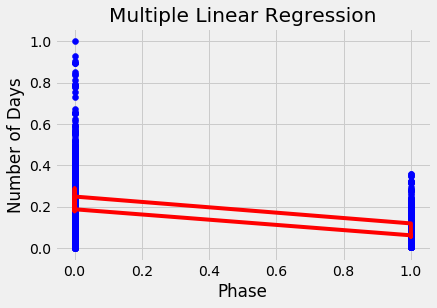

In [434]:
plt.scatter(df4.iloc[:,1], y, color = 'blue') 
plt.plot(df4.iloc[:,1], regr.predict(df4), color = 'red') 
plt.title('Multiple Linear Regression') 
plt.xlabel('Phase') 
plt.ylabel('Number of Days') 
  
plt.show() 

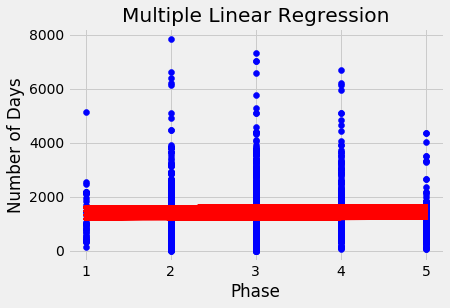

In [276]:
plt.scatter(x_train.iloc[:,1], y_train, color = 'blue') 
plt.plot(x_train.iloc[:,1], regr.predict(x_train), color = 'red') 
plt.title('Multiple Linear Regression') 
plt.xlabel('Phase') 
plt.ylabel('Number of Days') 
  
plt.show() 

##### Linear regression

In [133]:
reg=linear_model.LinearRegression()

In [151]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [181]:
reg.predict(x_test)

array([1644.43879708, 1486.81061948, 1145.29384062, 1670.69922074,
       1355.44286554, 1145.29384062, 1486.81061948, 1171.55426428,
       1460.55019582, 1171.55426428, 1618.17837343, 1618.17837343,
       1618.17837343, 1644.43879708, 1302.92201822, 1145.29384062,
       1171.55426428, 1696.9596444 , 1644.43879708, 1644.43879708,
       1171.55426428, 1696.9596444 , 1171.55426428, 1171.55426428,
       1644.43879708, 1513.07104314, 1355.44286554, 1618.17837343,
       1460.55019582, 1644.43879708, 1618.17837343, 1618.17837343,
       1513.07104314, 1171.55426428, 1460.55019582, 1670.69922074,
       1618.17837343, 1355.44286554, 1618.17837343, 1618.17837343,
       1486.81061948, 1644.43879708, 1618.17837343, 1644.43879708,
       1460.55019582, 1670.69922074, 1171.55426428, 1618.17837343,
       1513.07104314, 1381.70328919, 1644.43879708, 1486.81061948,
       1302.92201822, 1618.17837343, 1618.17837343, 1618.17837343,
       1618.17837343, 1145.29384062, 1302.92201822, 1145.29384

In [135]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [157.6281776   26.26042366]


In [184]:
print('Variance score: {}'.format(reg.score(x_test, y_test))) 

Variance score: 0.00039027195148477745


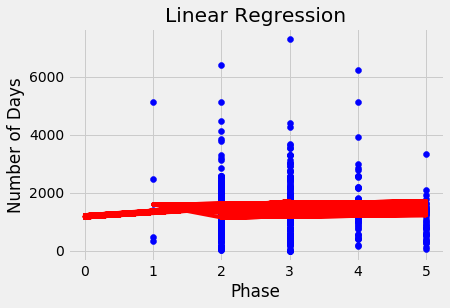

In [210]:
plt.scatter(x_test.iloc[:,1], y_test, color = 'blue') 
plt.plot(x_test, reg.predict(x_test), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Phase') 
plt.ylabel('Number of Days') 
  
plt.show() 

##### Polynomial Regression

In [156]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(x_train) 

In [214]:
X_poly

array([[ 1.,  2.,  2., ..., 16., 16., 16.],
       [ 1.,  3.,  3., ..., 81., 81., 81.],
       [ 1.,  2.,  3., ..., 36., 54., 81.],
       ...,
       [ 1.,  3.,  3., ..., 81., 81., 81.],
       [ 1.,  1.,  2., ...,  4.,  8., 16.],
       [ 1.,  3.,  2., ..., 36., 24., 16.]])

In [159]:
poly.fit(X_poly, y_train) 
lin2 = linear_model.LinearRegression() 
lin2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [217]:
print('Variance score: {}'.format(lin2.score(poly.transform(x_test),y_test)))

Variance score: 0.11535352025666223


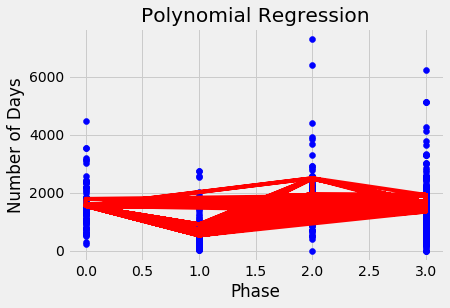

In [191]:
plt.scatter(x_test.iloc[:,0], y_test, color = 'blue') 
  
plt.plot(x_test.iloc[:,0], lin2.predict(poly.fit_transform(x_test)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Phase') 
plt.ylabel('Number of Days') 
  
plt.show() 

##### Random Forest Regressor

In [225]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [257]:
X

,phase_new,mesh_term,enrollment,count
0,2.0,3,5.0,2
1,2.0,3,12.0,6
2,2.0,3,12.0,3
3,2.0,3,12.0,3
4,2.0,3,3.0,2
5,2.0,3,3.0,1
6,3.0,3,19.0,3
7,3.0,3,19.0,2
8,3.0,3,19.0,10
9,3.0,3,19.0,1


In [226]:
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [268]:
import pickle
pickle.dump(regressor, open('rfregressor.pkl', 'wb'))

In [239]:
y_pred1=regressor.predict(x_test)

In [240]:
from sklearn.metrics import explained_variance_score
#print(explained_variance_score(y_test, y_pred))
print('Variance score: {}'.format(regressor.score(X, y))) 
from sklearn.metrics import r2_score
print("R2 score:",r2_score(y_test, y_pred1))
print("RMSE score",np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Variance score: 0.9899795614814052
R2 score: 0.9862537863623296
RMSE score 74.11818986513994


In [236]:
print('Variance score: {}'.format(regressor.score(x_test, y_test)))

Variance score: 0.9862537863623296


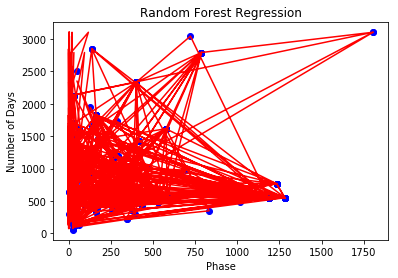

In [243]:
plt.scatter(x_test.iloc[:,2], y_test, color = 'blue') 
plt.plot(x_test, regressor.predict(x_test), color = 'red') 
plt.title('Random Forest Regression') 
plt.xlabel('Phase') 
plt.ylabel('Number of Days') 
  
plt.show() 

##### MLP Regressor

In [244]:
from sklearn.neural_network import MLPRegressor

In [246]:
mlp_regressor=MLPRegressor()

In [247]:
mlp_regressor.fit(X,y)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [251]:
y_pred3=mlp_regressor.predict(x_test)

In [252]:
print("R2 score:",r2_score(y_test, y_pred3))

R2 score: 0.02280119644253631


##### Decision Tree Regressor

In [253]:
from sklearn.tree import DecisionTreeRegressor
dregressor = DecisionTreeRegressor(random_state = 0)
dregressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [254]:
print('Variance score: {}'.format(dregressor.score(X, y)))

Variance score: 0.9914454845471109


In [255]:
y_pred2 = regressor.predict(x_test)

In [256]:
from sklearn.metrics import explained_variance_score
#print(explained_variance_score(y_test, y_pred))
print('Variance score: {}'.format(dregressor.score(X, y))) 
from sklearn.metrics import r2_score
print("R2 score:",r2_score(y_test, y_pred2))
print("RMSE score",np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Variance score: 0.9914454845471109
R2 score: 0.9862537863623296
RMSE score 74.11818986513994


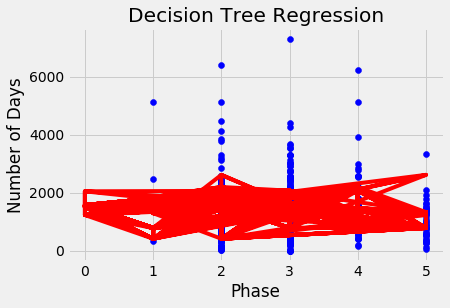

In [213]:
plt.scatter(x_test.iloc[:,1], y_test, color = 'blue') 
plt.plot(x_test, dregressor.predict(x_test), color = 'red') 
plt.title('Decision Tree Regression') 
plt.xlabel('Phase') 
plt.ylabel('Number of Days') 
  
plt.show() 

In [825]:
result

,nct_id,mesh_term,phase,start_date,completion_date,number_of_days,mesh_term_new
0,NCT02487511,438,Phase 4,2015-08-01,2017-01-31,549,Gastrointestinal Diseases
1,NCT02487511,311,Phase 4,2015-08-01,2017-01-31,549,Digestive System Diseases
2,NCT02487498,677,Phase 3,2015-07-27,2016-09-06,407,Lung Diseases
3,NCT02487498,677,Phase 3,2015-07-27,2016-09-06,407,Lung Diseases
4,NCT02487446,677,Phase 3,2015-07-28,2016-09-12,412,Lung Diseases
5,NCT02487446,677,Phase 3,2015-07-28,2016-09-12,412,Lung Diseases
6,NCT02487407,50,Phase 2,2015-07-01,2017-06-01,701,Amyotrophic Lateral Sclerosis
7,NCT02487355,863,Phase 2,2015-05-01,2017-12-01,945,Pain
8,NCT02487316,685,Phase 4,2015-07-01,2017-12-01,884,Lymphoma
9,NCT02487238,1173,Phase 1,2015-11-01,2018-07-01,973,Ulcer


## END